In [232]:
# Nama : Marcellus Michael Herman Kahari
# NIM : 13520057
# Kelas : K03

# Set up awal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets

In [233]:
# Fungsi Bantu

# Fungsi getAngle digunakan untuk mendapatkan sudut yang dibentuk 3 titik
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang
 
# Fungsi isEqual digunakan untuk membandingkan apakah dua buah koordinat memiliki nilai yang sama
def isEqual(koor1, koor2):
    return koor1[0] == koor2[0] and koor1[1] == koor2[1]

# Fungsi isExist digunakan untuk mengetahui apakah koordinat terdapat di dalam array
def isExist(koordinat, array):
    for value in array:
        if(koordinat[0] == value[0] and koordinat[1] == value[1]):
            return True
    return False

# Fungsi determinan digunakan untuk mengetahui apakah titik pada koor 3 terleta di atas garis yang dibentuk koor 1 dan koor 2 atau tidak
def determinan(koor1,koor2,koor3):
    return koor1[0]*koor2[1] + koor3[0] * koor1[1] + koor2[0] * koor3[1] - koor3[0] * koor2[1] - koor2[0] * koor1[1] - koor1[0] * koor3[1]

In [234]:
# Fungsi merge
def mergeHasil(result,array):
    for koordinat in array:
        if(not isExist(koordinat,result)):
            result = np.concatenate((result,[koordinat]), axis=0)
    return result

# Fungsi pisah array
def pisahArray(getMin,getMax, bucket):
    aboveKoor = np.empty((0,3), float)
    belowKoor = np.empty((0,3), float)
    for koordinat in bucket:
        if(determinan(getMin,getMax,koordinat) > 0.0 and not isEqual(getMin, koordinat) and not isEqual(getMax, koordinat)):
            aboveKoor = np.concatenate((aboveKoor,[koordinat]), axis=0)
        elif (determinan(getMin,getMax,koordinat) < 0.0 and not isEqual(getMin, koordinat) and not isEqual(getMax, koordinat)):
            belowKoor = np.concatenate((belowKoor,[koordinat]), axis=0)
    return aboveKoor, belowKoor

# Fungsi untuk mempush hasil ke dalam result
def pushResult(getMin,getMax,result,array):
    indexmin = int(getMin[2])
    indexmax = int(getMax[2])
    indextemp = int(array[0][2])
    result = np.concatenate((result,[[indexmin,indextemp]]), axis=0)
    result = np.concatenate((result,[[indextemp,indexmax]]), axis=0)
    return result

In [235]:
# Fungsi Rekursif

# Fungsi convexHullScratch digunakan sebagai fungsi rekursif
def convexHullScratch(bucket ,getMin, getMax, mark):
    result = np.empty((0,2), int)
    aboveKoor, belowKoor = pisahArray(getMin,getMax, bucket)

    if((len(aboveKoor) == 0 and (mark == 2 or mark == 0)) or (len(belowKoor) == 0 and (mark == 1 or mark == 0))):
        result = np.concatenate((result,[[int(getMin[2]),int(getMax[2])]]), axis=0)
    if(len(aboveKoor) == 1 and (mark == 2 or mark == 0)):
        result = pushResult(getMin,getMax,result,aboveKoor)
    if(len(belowKoor) == 1 and (mark == 1 or mark == 0)):
        result = pushResult(getMin,getMax,result,belowKoor)
        
    if(len(belowKoor) > 0 and (mark == 0 or mark == 1)):
        temp = belowKoor[0]
        hasil = 0
        for koordinat in belowKoor:
            if(hasil < getAngle(koordinat, getMin, getMax)):
                hasil = getAngle(koordinat, getMin, getMax)
                temp = koordinat
        result1 = convexHullScratch(belowKoor,getMin,temp, 1)
        result2 = convexHullScratch(belowKoor,temp,getMax, 1)
        result = mergeHasil(result,result1)
        result = mergeHasil(result,result2)

    if(len(aboveKoor) > 0 and (mark == 0 or mark == 2)):
        temp = aboveKoor[0]
        hasil = 0
        for koordinat in aboveKoor:
            if(hasil < getAngle(getMax, getMin, koordinat)):
                hasil = getAngle(getMax, getMin, koordinat)
                temp = koordinat
        result1 = convexHullScratch(aboveKoor,getMin,temp, 2)
        result2 = convexHullScratch(aboveKoor,temp,getMax, 2)
        result = mergeHasil(result,result1)
        result = mergeHasil(result,result2)

    return result

In [236]:
# Fungsi Utama

# Fungsi myConvexHull digunakan sebagai fungsi inisialisasi awal 
def myConvexHull(data):
    bucket = np.array(data)
    index = np.array([[i] for i in range(len(bucket))])
    bucket = np.append(bucket,index, axis=1)
    getMax = bucket[0]
    getMin = bucket[0]
    for koordinat in bucket:
        if(getMax[0] < koordinat[0]):
            getMax = koordinat
        if(getMin[0] > koordinat[0]):
            getMin = koordinat
        if(getMin[0] == koordinat[0] and getMin[1] > koordinat[1]):
            getMin = koordinat
        if(getMax[0] == koordinat[0] and getMax[1] < koordinat[1]):
            getMax = koordinat
    hull = convexHullScratch(bucket,getMin,getMax, 0)
    return hull


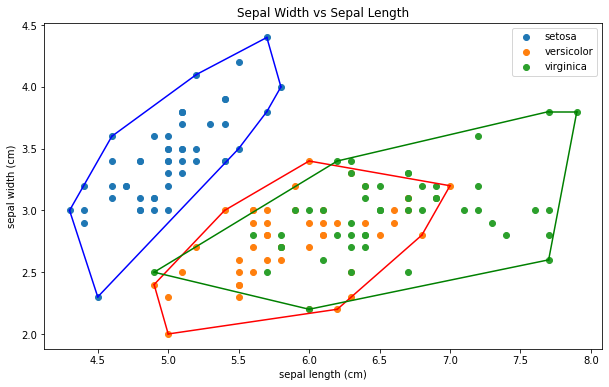

In [237]:
# 1. Data set Iris Sepal Width Vs Sepal Length

data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

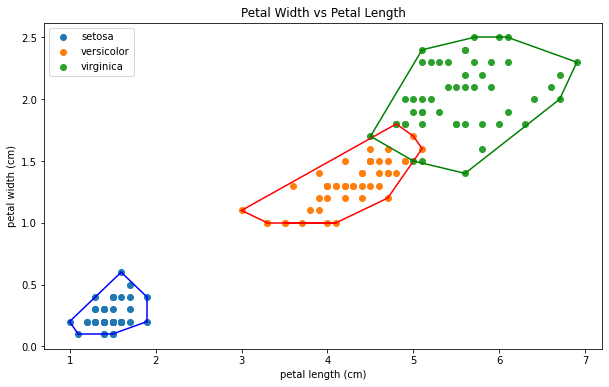

In [238]:
# 2. Data set Iris Petal Width Vs Petal Length

data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

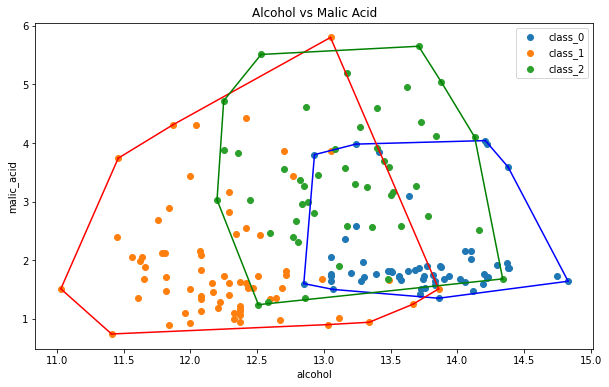

In [239]:
# 3. Data set Wine Alcohol Vs Malic Acid

data = datasets.load_wine()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Malic Acid')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

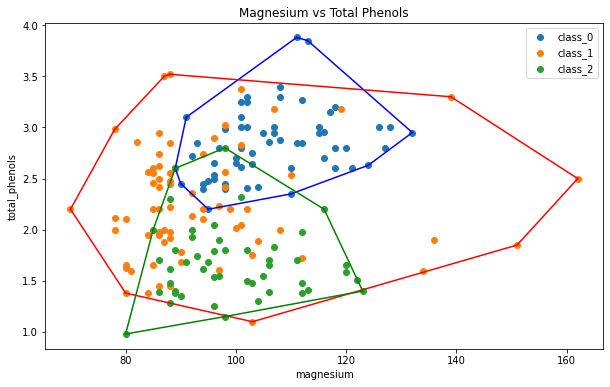

In [240]:
# 4. Data set Wine Magnesium Vs Total Phenols

data = datasets.load_wine()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Magnesium vs Total Phenols')
plt.xlabel(data.feature_names[4])
plt.ylabel(data.feature_names[5])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[4,5]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

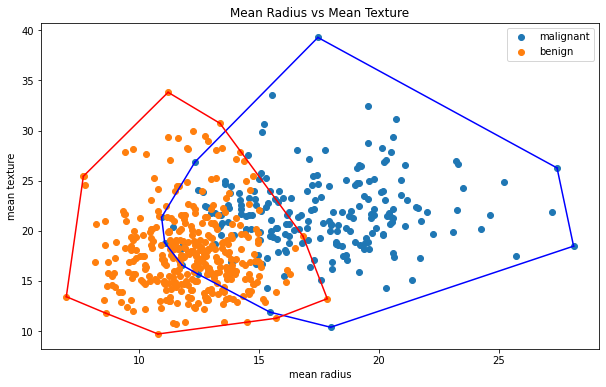

In [241]:
# 5. Data set Breast Cancer Mean Radius Vs Mean Texture

data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Radius vs Mean Texture')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()